# Test de vega sous windows

## Avec super environnement python virtuel très propre python 3.9.10

jupyter --version

'''
Selected Jupyter core packages...
IPython          : 8.1.1
ipykernel        : 6.9.2
ipywidgets       : 7.7.0
jupyter_client   : 7.1.2
jupyter_core     : 4.9.2
jupyter_server   : 1.15.6
jupyterlab       : 3.3.2
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.2.0
notebook         : 6.4.10
qtconsole        : 5.2.2
traitlets        : 5.1.1
'''

## Si j'utilise le conda

'''
Selected Jupyter core packages...
IPython          : 8.2.0
ipykernel        : 6.12.1
ipywidgets       : 7.7.0
jupyter_client   : 7.2.1
jupyter_core     : 4.9.2
jupyter_server   : 1.16.0
jupyterlab       : 3.3.2
nbclient         : 0.5.13
nbconvert        : 6.4.5
nbformat         : 5.3.0
notebook         : 6.4.10
qtconsole        : 5.3.0
traitlets        : 5.1.1
'''

## Résultat

Après la mise à jour de VSCode, plus de pb de MIME type. 
Mais l'objet Vega n'est pas JSON serializable. 
Voir https://github.com/microsoft/vscode-jupyter/issues/4382

Avec l'extension Vega de VSCode, je peux définir une spec et regarder le resultat. Mais pas satisfaisant pour les données. 

Option qui fonctionnne : Altaïr. 

pip install altair vega_datasets panel altair_saver bokeh jupyter_bokeh


In [4]:
import altair as alt
from vega_datasets import data
import panel as pn
pn.extension('vega')

from IPython.display import display
import pandas as pd
from vega import VegaLite


In [3]:
from IPython.display import display
import pandas as pd

def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)



In [24]:
import pandas as pd

from vega import VegaLite

import pandas as pd

from IPython.display import display 
   
v = VegaLite(
	{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "description": "A simple bar chart with embedded data.",
  "data": {
    "values": [
      {"a": "A", "b": 28}, {"a": "B", "b": 55}, {"a": "C", "b": 43},
      {"a": "D", "b": 91}, {"a": "E", "b": 81}, {"a": "F", "b": 53},
      {"a": "G", "b": 19}, {"a": "H", "b": 87}, {"a": "I", "b": 52}
    ]
  },
  "mark": "bar",
  "encoding": {
    "x": {"field": "a", "type": "nominal", "axis": {"labelAngle": 0}},
    "y": {"field": "b", "type": "quantitative"}
  }
})

#print(v)
bundle = {}
bundle['application/vnd.vegalite.v4+json'] = v
#display(bundle)
print(type(bundle))
#json.load(bundle)
#json_object = json.dumps(bundle, indent = 4) 
#print(json_object)
#display(bundle, raw=True)
#print(bundle)


from altair.vega import vega
import json
with open("airport-connections.vg.json") as f:
    s = json.load(f)
vega(s)
#Ne s'affiche pas non plus

<class 'dict'>


<Vega 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [23]:
import pandas as pd

from vega import VegaLite

import pandas as pd

#https://panel.holoviz.org/reference/panes/Vega.html
import panel as pn
pn.extension('vega')

df = pd.read_json('https://raw.githubusercontent.com/vega/ipyvega/master/notebooks/cars.json')

print(df.shape)

print(df.head())

v = VegaLite({
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "mark": "point",
  "encoding": {
    "y": {"type": "quantitative", "field": "Acceleration"},
    "x": {"type": "quantitative", "field": "Horsepower"}
  }
}, df)

vgl_pane = pn.panel(v, height=240)
vgl_pane

(406, 9)
                        Name  Miles_per_Gallon  Cylinders  Displacement  \
0  chevrolet chevelle malibu              18.0          8         307.0   
1          buick skylark 320              15.0          8         350.0   
2         plymouth satellite              18.0          8         318.0   
3              amc rebel sst              16.0          8         304.0   
4                ford torino              17.0          8         302.0   

   Horsepower  Weight_in_lbs  Acceleration  Year Origin  
0       130.0           3504          12.0  1970    USA  
1       165.0           3693          11.5  1970    USA  
2       150.0           3436          11.0  1970    USA  
3       150.0           3433          12.0  1970    USA  
4       140.0           3449          10.5  1970    USA  


BokehModel(combine_events=True, render_bundle={'docs_json': {'68cd294d-5412-43c5-bceb-538987f71082': {'defs': …

Str(VegaLite, height=240)

In [26]:
import altair as alt
from vega_datasets import data
pn.extension('vega')

cars = data.cars()

chart = alt.Chart(cars).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

altair_pane = pn.panel(chart)
altair_pane

BokehModel(combine_events=True, render_bundle={'docs_json': {'99a32590-2570-48ce-9862-c4549c431b9c': {'defs': …

Vega(Chart)

In [27]:
#https://panel.holoviz.org/gallery/simple/altair_choropleth.html#simple-gallery-altair-choropleth


altair_logo = 'https://altair-viz.github.io/_static/altair-logo-light.png'
states = alt.topo_feature(data.us_10m.url, 'states')
states['url'] = 'https://raw.githubusercontent.com/vega/vega/master/docs/data/us-10m.json'
#states['url'] = 'C:\Travail\CNRS_poitiers\Cartographie\PUD_avril2022\data\Fond_carto\word1789_topojson.json'
source = 'https://raw.githubusercontent.com/vega/vega/master/docs/data/population_engineers_hurricanes.csv'
variable_list = ['population', 'engineers', 'hurricanes']

def get_map(variable):
    return alt.Chart(states).mark_geoshape().encode(
        alt.Color(variable, type='quantitative')
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(source, 'id', [variable])
    ).properties(
        width="container",
        height=300,
    ).project(
        type='albersUsa'
    ).repeat(
        row=[variable]
    )

variable = pn.widgets.Select(options=variable_list, name='Variable', width=250)
logo = pn.panel(altair_logo, height=150, align="center")
vega_panel = pn.pane.Vega(sizing_mode="stretch_width", margin=(10,100,10,5))
    
@pn.depends(variable.param.value, watch=True)
def update_vega_pane(variable):
    vega_panel.object = get_map(variable)

update_vega_pane(variable.value)
    
pn.Row(
    pn.Column('# Altair Choropleth Maps', logo, variable),
    vega_panel
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'41967b25-1081-4e11-aed3-27b9e48cc449': {'defs': …

Row
    [0] Column
        [0] Markdown(str)
        [1] PNG(str, align='center', height=150)
        [2] Select(name='Variable', options=['population', ...], value='population', width=250)
    [1] Vega(RepeatChart, margin=(10, 100, 10, 5), sizing_mode='stretch_width')

In [18]:
#https://colab.research.google.com/github/uwdata/visualization-curriculum/blob/master/altair_cartographic.ipynb#scrollTo=wwJ-kKtPKuJ9
#https://altair-viz.github.io/user_guide/configuration.html#config-title

#https://stackoverflow.com/questions/61025130/altair-globe-map-centering
#https://solveforums.msomimaktaba.com/threads/solved-how-to-use-multiselection-in-altair-to-select-other-elements-from-a-mapping-dictionary.651251/
#https://vega.github.io/vega/docs/projections/
#https://vega.github.io/vega-lite/docs/projection.html#projection-types
#https://vega.github.io/vega-lite/examples/#maps-geographic-displays

import altair as alt
from vega_datasets import data

pays_url = './word1789_topojson.json'
pays = alt.topo_feature(pays_url, 'word1789_geojson')

#projectionConfig = alt.ProjectionConfig( center = [6, 46], scale=743)
#projection = alt.Projection('conicEquidistant', scale=743)

# World 1789, center en France and England

background = alt.Chart(pays).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300,
    title='world 1789'
).project('conicEquidistant',scale=900).configure_projection(center = [6, 46])

## Grosse galère pour faire marcher les projections avec configuration. 
# Seulement parce que j'avais oublié d'affecter la variable background après avoir appelé configure_projection, ...

#.project(projection) 
#.project('conicEquidistant').configure_projection(center = [6, 46], scale=743)
#.project(type='conicEquidistant', center = [6, 46], scale=743)
#projection=alt.Projection(type='conicEquidistant', center = [6, 46], scale=743)

#epsg3035 = "+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +units=m +no_defs"
# ['albers', 'albersUsa', 'azimuthalEqualArea', 'azimuthalEquidistant', 'conicConformal', 'conicEqualArea', 'conicEquidistant', 'equalEarth', 'equirectangular', 'gnomonic', 'identity', 'mercator', 'naturalEarth1', 'orthographic', 'stereographic', 'transverseMercator'


# Note : il faut affecter background après l'opération de configure_xxx

background = background.configure_title(
    fontSize=20,
    font='Calibri',
    anchor='start',
    color='blue'
)

background = background.configure_view(
    continuousHeight=300,
    continuousWidth=500,
    #strokeWidth=4,
    fill='lightblue'
    #stroke='red',
)


background

#background.project('conicEquidistant').
#background.configure_projection(center = [6, 46], scale=743) # albersUsa azimuthalEqualArea mercator conicEquidistant
#map.configure_view(stroke=None)

alt.Chart(...)

In [10]:
# Essais avec différentes source de ports : geojson, csv, url

#url_geojson = 'http://data.portic.fr/api/ports?format=geojson'
#ports = alt.Data(url=url_geojson, format=alt.DataFormat(property='features',type='json'))
#url_ports_api = 'http://data.portic.fr/api/ports?format=geojson'
#url_ports_geojson = './data/ports_navigocorpus1789_geojson.geojson'

alt.data_transformers.enable('csv')
#ports_url = 'http://data.portic.fr/api/ports?srid=4326&format=csv'
ports_url  = "./data/ports_csv.csv"

points = alt.Chart(ports_url).mark_circle().encode(
    longitude='x:Q',
    latitude='y:Q',
    size=alt.Size('total:Q', title='Number of citations as pointcall'),
    color=alt.value('steelblue'),
    tooltip=['toponym:N','total:Q']
).properties(
    title='Ports of navigo'
).project('conicEquidistant',scale=900).configure_projection(center = [6, 46])
#.project('mercator',scale=900)

'''
alt.Chart(ports).mark_geoshape().encode(
        size=alt.Size('properties.total:Q', title='Number of citations as pointcall'),
        color=alt.value('steelblue'),
        tooltip=['properties.toponym:N','properties.total:Q']
    )'''
#Ceci ne marche pas avec le geojson...

points 

alt.Chart(...)

In [7]:
#https://colab.research.google.com/github/uwdata/visualization-curriculum/blob/master/altair_cartographic.ipynb#scrollTo=wwJ-kKtPKuJ9
import altair as alt
from vega_datasets import data

#Source de type topojson
pays_url = './word1789_topojson.json'
pays = alt.topo_feature(pays_url, 'word1789_geojson')

#Source de type csv
alt.data_transformers.enable('csv')
#url_ports_csv = 'http://data.portic.fr/api/ports?srid=4326&format=csv'
url_ports_csv  = "./data/ports_csv.csv"

ports = alt.Data(url=ports_url)

ports 



"\nalt.Chart(ports).mark_geoshape().encode(\n        size=alt.Size('properties.total:Q', title='Number of citations as pointcall'),\n        color=alt.value('steelblue'),\n        tooltip=['properties.toponym:N','properties.total:Q']\n    )"

In [11]:
# Les deux couches ensemble
#Ca marche enfin ! Un peu minable pour l'instant

# World 1789, center en France and England

map = alt.layer(
    # use the sphere of the Earth as the base layer
    alt.Chart({'sphere': True}).mark_geoshape(
        fill='#e6f3ff'
    ),
    # add a graticule for geographic reference lines
    alt.Chart({'graticule': True}).mark_geoshape(
        stroke='#ffffff', strokeWidth=1
    ),
    # and then the countries of the world
    alt.Chart(pays).mark_geoshape(
        fill='lightgray', stroke='white', strokeWidth=0.5
    ),
    #the ports
    alt.Chart(ports_url).mark_circle().encode(
        longitude='x:Q',
        latitude='y:Q',
        size=alt.Size('total:Q', title='Number of citations as pointcall'),
        color=alt.value('steelblue'),
        tooltip=['toponym:N','total:Q']
    )
).properties(
    width=600,
    height=400,
    title='world 1789'
).project('conicEquidistant', scale=900).configure_projection(center = [6, 46]).configure_view(stroke=None)


map

alt.LayerChart(...)

# Reprise des données préparées par Paul dans l'autre script

In [122]:
import csv
from collections import defaultdict
from typing import TypedDict
import json

class MonthDataPoint(TypedDict):
    month: str 
    destination: str
    nb_conge: int
    year: int


destination_month_destination = []

total_by_month = defaultdict(int)

MONTHS = ["01 Janvier","02 Février"," 03 Mars","04 Avril","05 Mai","06 Juin","07 Juillet","08 Août","09 Septembre","10 Octobre","11 Novembre","12 Décembre"]
year_file = [(1790, "./data/PFISTER_PORTS_NAVIRES_TAB_91_p_342_1790.csv"), (1781, "./data/PFISTER_PORTS_NAVIRES_TAB_90_p_341_1781.csv")]
for (year, file) in year_file:
    with open(file, "r") as data:
        for row in csv.DictReader(data):
            
            for month in MONTHS:
                if month in row and row[month] != '':
                    data_point:MonthDataPoint = MonthDataPoint(
                        month= month,
                        destination= row['destination'],
                        nb_conge= int(row[month]),
                        year= year
                    )
                    destination_month_destination.append(data_point)
                    total_by_month[month] += int(row[month])

#print(json.dumps(destination_month_destination))

#[{"month": "01 Janvier", "destination": "Deal", "nb_conge": 19, "year": 1790}]

In [123]:
# Transformer en CSV (faire les agrégats et la jointure avec les données de ports pour faire la carto)

#print(destination_month_destination)

import pandas as pd
decennie = pd.DataFrame(destination_month_destination)
print(decennie.shape)

print(decennie.columns)

pd.unique(decennie['destination'])

#decennie  = decennie.set_index('destination')



(282, 4)
Index(['month', 'destination', 'nb_conge', 'year'], dtype='object')


array(['Deal', 'Douvres', 'Colchester', 'Folkestone', 'Maldon',
       'Whistable', 'Hasting', 'Feversham', 'Harwich', 'Burnham', 'Leigh',
       'Rye', 'Londres', 'Dungeness', 'Rochester', 'Yarmouth',
       'Brightlandsea', 'Margate', 'Lydd', 'Pegwell', 'Wivenhoe',
       'Aberdeen', 'Lynn', 'Milton', 'Reculver', 'Woodbridge',
       'Chichester', 'Dymchurch', 'Hythe', 'Barking', 'Foy', 'Guerneze',
       'Greenwith', 'Ipswich', 'Southwold', 'Eawsand & Chatham',
       'Gravesand', 'Colmay-Falmouth', 'Langley-Ramsay', 'Cowes', 'Leith',
       'Seasalter', 'Chatham', 'Sandgate', 'Liestaff', 'Bradwell',
       'Hanson', 'Norwich', 'Budleigh Salterton', 'Essex', 'Christchurch',
       'Topsham', 'Holy Island'], dtype=object)

# Récupérer les ports de navigo 


In [124]:
# Aller chercher les données de ports via l'API (à rajouter dans le load_data.sh)

#curl -o data/navigo_ports.csv "data.portic.fr/api/ports/?format=csv&srid=4326"

ports = pd.read_csv("http://data.portic.fr/api/ports/?format=csv&srid=4326", encoding='utf8')

## Il y avait un souci car l'API ne renvoyait pas les homeports (seulement les ports utilisés en pointcall)
## Le pb est réglé depuis le 04 avril 2022
## Du coup j'ai commité dans le module ports_09mars2022.csv avec ; comme séparateur, encodage utf8

#ports = pd.read_csv("./data/ports_09mars2022.csv", encoding='latin1', sep=';')

In [126]:
print(ports.shape)
#(1426, 26)
print(ports.columns)

ports.head()

# quel filtre : l'Angleterre ou plus largement Grande-Bretagne ?
test = ports.query('substate_1789_fr == "Angleterre"')
#test.head()

ports_anglais = ports.query('state_1789_fr == "Grande-Bretagne"')
ports_anglais['toponyme_standard_fr']

ports_anglais.set_index('toponyme_standard_fr',inplace = True, drop=False)
ports_anglais.drop(['Unnamed: 0'], axis=1)



(1426, 26)
Index(['Unnamed: 0', 'ogc_fid', 'uhgs_id', 'x', 'y', 'total', 'toponym',
       'toponyme_standard_fr', 'toponyme_standard_en', 'substate_1789_fr',
       'state_1789_fr', 'substate_1789_en', 'state_1789_en',
       'belonging_states', 'belonging_substates', 'status', 'has_a_clerk',
       'geonameid', 'admiralty', 'province', 'shiparea', 'ferme_direction',
       'ferme_bureau', 'partner_balance_1789', 'partner_balance_supp_1789',
       'point'],
      dtype='object')


,ogc_fid,uhgs_id,x,y,total,toponym,toponyme_standard_fr,toponyme_standard_en,substate_1789_fr,state_1789_fr,...,has_a_clerk,geonameid,admiralty,province,shiparea,ferme_direction,ferme_bureau,partner_balance_1789,partner_balance_supp_1789,point
toponyme_standard_fr,,,,,,,,,,,,,,,,,,,,,
"Terre-Neuve, île de",18,B2119892,-56.000000,49.000000,68,Terre Neuve,"Terre-Neuve, île de",Newfoundland,Colonies britanniques d'Amérique,Grande-Bretagne,...,NaN,5889189.0,NaN,NaN,ACA-NEWF,NaN,NaN,Angleterre,Etranger,"{""type"":""Point"",""coordinates"":[-56,49]}"
Baie de Gibraltar,853,A0354076,-5.433333,36.150000,1,Rade de Gibraltar,Baie de Gibraltar,Bay of Gibraltar,possessions anglaises en Méditerranée,Grande-Bretagne,...,NaN,2411584.0,NaN,NaN,ACE-CADI,NaN,NaN,Angleterre,Etranger,"{""type"":""Point"",""coordinates"":[-5.433333,36.15]}"
Férolle,469,B2120324,-57.100000,51.016667,2,Ferol côte de Terre Neuve,Férolle,Ferolle,Colonies britanniques d'Amérique,Grande-Bretagne,...,NaN,3164433.0,NaN,NaN,ACA-NEWF,NaN,NaN,Angleterre,Etranger,"{""type"":""Point"",""coordinates"":[-57.1,51.016667]}"
Lerwick,595,A0385744,-1.150000,60.150000,2,Lauwig,Lerwick,Lerwick,Ecosse,Grande-Bretagne,...,NaN,2644605.0,NaN,Ecosse,ANE-FISL,NaN,NaN,Angleterre,Etranger,"{""type"":""Point"",""coordinates"":[-1.15,60.15]}"
Brompton,241,A0398458,0.533333,51.400000,1,Drompton [Brompton],Brompton,Brompton,Angleterre,Grande-Bretagne,...,NaN,2654585.0,NaN,Kent,NOR-THAM,NaN,NaN,Angleterre,Etranger,"{""type"":""Point"",""coordinates"":[0.533333,51.4]}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
King's Lynn,933,A0381991,0.383333,52.750000,15,Lynn,King's Lynn,King's Lynn,Angleterre,Grande-Bretagne,...,NaN,6947737.0,NaN,Norfolk,NOR-HUMB,NaN,NaN,Angleterre,Etranger,"{""type"":""Point"",""coordinates"":[0.383333,52.75]}"
Biddeford,1433,B1985005,-77.466667,18.400000,0,Biddefort,Biddeford,Biddeford,Colonies britanniques d'Amérique,Grande-Bretagne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angleterre,Etranger,"{""type"":""Point"",""coordinates"":[-77.466667,18.4]}"
Dungeness,1180,A0386886,0.983333,50.916668,0,NaN,Dungeness,Dungeness,Angleterre,Grande-Bretagne,...,NaN,NaN,NaN,Kent,MAN-DOVE,NaN,NaN,Angleterre,Etranger,"{""type"":""Point"",""coordinates"":[0.983333,50.916..."


In [127]:
#Rajouter les ports supplémentaires codés par Silvia


#Lire les codage de ports supplémentaires
from dunkerquesprint import get_online_csv

ports_supp = get_online_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRq2TJOb7Ima9hBKiO1Kde_yFYoS6grucmtb6KRh6QpF4nwzjJF34WvpsGjS4wtrQ/pub?gid=1098819207&single=true&output=csv")
type(ports_supp) #list

#print(ports_supp)
#toponyme_Christian	UHGS	toponyme_FR	toponyme_GB	lat	long	facade
df_ports_supp = pd.DataFrame(ports_supp, columns=['toponyme_Christian', 'UHGS', 'toponyme_FR', 'toponyme_GB', 'lat', 'long',  'facade'])
#rename columns
df_ports_supp = df_ports_supp.rename(columns={"UHGS": "uhgs_id", "toponyme_FR": "toponyme_standard_fr", "toponyme_GB" : "toponyme_standard_en", "lat":"y", "long":"x" })
print(df_ports_supp.shape)#(21, 7)

df_ports_supp

df_ports_supp.set_index('toponyme_Christian',inplace = True, drop=False)
ports_anglais = pd.concat([ports_anglais, df_ports_supp], keys=["ports", "supp"])

#test  = pd.concat([ports_anglais, df_ports_supp])




(21, 7)


# Joindre les ports avec les flux récupéré des données de Christian par le nom des ports (fuzzy )

In [128]:
ports_anglais

#ports_anglais['toponyme']=='Deal'
ports_anglais.query('toponyme_standard_fr == "Deal"')

,,Unnamed: 0,ogc_fid,uhgs_id,x,y,total,toponym,toponyme_standard_fr,toponyme_standard_en,substate_1789_fr,...,admiralty,province,shiparea,ferme_direction,ferme_bureau,partner_balance_1789,partner_balance_supp_1789,point,toponyme_Christian,facade
ports,Deal,754.0,819.0,A0386686,1.4,51.216667,100.0,Deal,Deal,Deal,Angleterre,...,NaN,Kent,NOR-DOVE,NaN,NaN,Angleterre,Etranger,"{""type"":""Point"",""coordinates"":[1.4,51.216667]}",NaN,NaN


In [129]:
decennie.query('destination == "Deal"')

,month,destination,nb_conge,year
0,01 Janvier,Deal,19,1790
1,03 Mars,Deal,14,1790
2,04 Avril,Deal,15,1790
3,05 Mai,Deal,7,1790
4,06 Juin,Deal,11,1790
5,07 Juillet,Deal,18,1790
6,09 Septembre,Deal,17,1790
7,10 Octobre,Deal,13,1790
8,11 Novembre,Deal,14,1790
178,01 Janvier,Deal,12,1781


In [132]:
#result = pd.concat([df_dix_ans_smog, ports_anglais], axis=1)

result = pd.merge(
    decennie,
    ports_anglais,
    how="outer",
    left_on='destination',
    right_on='toponyme_standard_fr',
    sort=True,
    #indicator=True,
    indicator="indicator_column"
)

In [133]:
## Liste de ceux qu'on ne trouve pas dans ports

#result.query('destination == "Deal"')
pd.unique(result.query('indicator_column == "left_only"')['destination'])
#result.query('indicator_column == "left_only"')



array(['Brightlandsea', 'Budleigh Salterton', 'Colmay-Falmouth',
       'Eawsand & Chatham', 'Essex', 'Feversham', 'Foy', 'Gravesand',
       'Greenwith', 'Guerneze', 'Hanson', 'Holy Island', 'Langley-Ramsay',
       'Leigh', 'Liestaff', 'Lynn', 'Reculver', 'Seasalter'], dtype=object)

In [237]:
#ports.query('toponyme == "Chatham "')
#.str.contains("abc")

#ports_anglais.query('"Chatham" <= toponyme_standard_fr <= "Chatham~"')
#(ports_anglais.query('toponyme_standard_fr.str.contains("Chatham")'))['toponyme_standard_fr']
#Chatham 
print("Londres".casefold())

#(ports_anglais.query('toponyme_standard_fr.str.casefold().contains("Londres".casefold())'))['toponyme_standard_fr']

ports_anglais.query('toponyme_standard_fr.str.contains("Londres") or toponyme_standard_en.str.contains("Londres")')
#ports_anglais.query('toponyme_standard_fr.str.contains("Londres")')
ports_anglais.query('toponyme_standard_fr.str.contains("Londres") or toponyme_standard_en.str.contains("Londres")') #Ok
ports_anglais.query('toponyme_standard_fr.str.contains("msa") or toponyme_standard_en.str.contains("msa")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Langley-Ramsay / 

#Pas trouvés
ports_anglais.query('toponyme_standard_fr.str.contains("Bradwell") or toponyme_standard_en.str.contains("Bradwell")') #Bradwell / 
ports_anglais.query('toponyme_standard_fr.str.contains("hris") or toponyme_standard_en.str.contains("hris")') #Christchurch /
ports_anglais.query('toponyme_standard_fr.str.contains("yn") or toponyme_standard_en.str.contains("yn")')['toustopos'] #Dymchurch / 
ports_anglais.query('toponyme_standard_fr.str.contains("f") or toponyme_standard_en.str.contains("f")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Foy / 
ports_anglais.query('toponyme_standard_fr.str.contains("ans") or toponyme_standard_en.str.contains("ans")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Hanson / 
ports_anglais.query('toponyme_standard_fr.str.contains("sland") or toponyme_standard_en.str.contains("sland")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #'Holy Island / 
ports_anglais.query('toponyme_standard_fr.str.contains("Li") or toponyme_standard_en.str.contains("Li")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Liestaff / Liestaff	
ports_anglais.query('toponyme_standard_fr.str.contains("or") or toponyme_standard_en.str.contains("wich")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Norwich / 	
ports_anglais.query('toponyme_standard_fr.str.contains("gw") or toponyme_standard_en.str.contains("gw")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Pegwell / 	
ports_anglais.query('toponyme_standard_fr.str.contains("sel") or toponyme_standard_en.str.contains("sel")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Seasalter / 	Wells on Sea	
ports_anglais.query('toponyme_standard_fr.str.contains("lton") or toponyme_standard_en.str.contains("Mi")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Milton / Middleton ou Walton	?	

#Trouvés
ports_anglais.query('toponyme_standard_fr.str.contains("sea") or toponyme_standard_en.str.contains("sea")') #Brightlandsea / Brightlingsea
ports_anglais.query('toponyme_standard_fr.str.contains("ud") or toponyme_standard_en.str.contains("ud")') #Budleigh Salterton / Saltfleet
ports_anglais.query('toponyme_standard_fr.str.contains("almouth") or toponyme_standard_en.str.contains("almouth")') #Colmay-Falmouth / Falmouth
ports_anglais.query('toponyme_standard_fr.str.contains("awsand") or toponyme_standard_en.str.contains("awsand")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Eawsand & Chatham / Chatham 
#Cawsand	Cawsand	MAN-PLYM	Devon shire
ports_anglais.query('toponyme_standard_fr.str.contains("Chatham") or toponyme_standard_en.str.contains("Chatham")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Chatham / Chatham
#905	Chatham	Chatham	NOR-THAM	Kent
ports_anglais.query('toponyme_standard_fr.str.contains("ssex") or toponyme_standard_en.str.contains("ssex")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Essex / Un port de l'essex comme Colchester
ports_anglais.query('toponyme_standard_fr.str.contains("Colchester") or toponyme_standard_en.str.contains("Colchester")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Essex / Un port de l'essex comme Colchester
ports_anglais.query('toponyme_standard_fr.str.contains("raves") or toponyme_standard_en.str.contains("raves")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Gravesand / Gravesend
ports_anglais.query('toponyme_standard_fr.str.contains("reenwi") or toponyme_standard_en.str.contains("reenw")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Greenwith / Greenwich
ports_anglais.query('toponyme_standard_fr.str.contains("Guerne") or toponyme_standard_en.str.contains("Guerne")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Guerneze / Guernesey
ports_anglais.query('toponyme_standard_fr.str.contains("Le") or toponyme_standard_en.str.contains("Le")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Leigh / Leith	
ports_anglais.query('toponyme_standard_fr.str.contains("Lynn") or toponyme_standard_en.str.contains("Lynn")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Lynn / King's Lynn	ou Lyme Regis	?	
ports_anglais.query('toponyme_standard_fr.str.contains("ulv") or toponyme_standard_en.str.contains("Re")')[['toponyme_standard_en','toponyme_standard_fr','shiparea', 'province', 'toustopos']] #Reculver / Reculvers	





londres


,toponyme_standard_en,toponyme_standard_fr,shiparea,province,toustopos
856,Lyme Regis,Lyme Regis,MAN-PORT,Devon shire,Lynn Regis
904,Reculvers,Reculvers,NOR-THAM,Kent,NaN


In [135]:
# On remplace dans destination les noms de ports par ceux qui vont bien

#decennie.query('destination == "Deal"')
decennie['destination_fixed'] = decennie['destination']  
decennie.query('destination == "Brightlandsea"')['destination_fixed'] = 'Brightlingsea'

decennie = decennie.replace({'destination_fixed': 'Brightlandsea'}, 'Brightlingsea')
decennie = decennie.replace({'destination_fixed': 'Budleigh Salterton'}, 'Saltfleet')
decennie = decennie.replace({'destination_fixed': 'Colmay-Falmouth'}, 'Falmouth')
decennie = decennie.replace({'destination_fixed': 'Eawsand & Chatham'}, 'Chatham')  

decennie = decennie.replace({'destination_fixed': 'Essex'}, 'Colchester') 
decennie = decennie.replace({'destination_fixed': 'Gravesand'}, 'Gravesend')
decennie = decennie.replace({'destination_fixed': 'Greenwith'}, 'Greenwich')
decennie = decennie.replace({'destination_fixed': 'Guerneze'}, 'Guernesey')
decennie = decennie.replace({'destination_fixed': 'Leigh'}, 'Leith')
decennie = decennie.replace({'destination_fixed': 'Lynn'}, "King's Lynn")
decennie = decennie.replace({'destination_fixed': 'Reculver'}, 'Reculvers')
decennie = decennie.replace({'destination_fixed': 'Aberseen'}, 'Aberdeen')
decennie = decennie.replace({'destination_fixed': 'Pastow'}, 'Padstow')
		


		

#decennie.query('destination == "Brightlandsea"')['destination_fixed'] 





C:\Users\cplume01\AppData\Local\Temp\ipykernel_25696\3827759267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decennie.query('destination == "Brightlandsea"')['destination_fixed'] = 'Brightlingsea'


In [136]:
decennie.query('destination == "Reculver"')['destination_fixed'] 


152    Reculvers
153    Reculvers
154    Reculvers
155    Reculvers
Name: destination_fixed, dtype: object

Refaire la jointure

In [137]:
result = pd.merge(
    decennie,
    ports_anglais,
    how="outer",
    left_on='destination_fixed',
    right_on='toponyme_standard_fr',
    sort=True,
    #indicator=True,
    indicator="indicator_column"
)

In [138]:
## Liste de ceux qu'on ne trouve pas dans ports

#result.query('destination == "Chatham"')
pd.unique(result.query('indicator_column == "left_only"')['destination'])
#result.query('indicator_column == "left_only"')

#Feversham', 'Foy', 'Hanson', 'Holy Island', 'Langley-Ramsay','Liestaff', 'Seasalter'

array(['Feversham', 'Foy', 'Hanson', 'Holy Island', 'Langley-Ramsay',
       'Liestaff', 'Seasalter'], dtype=object)

In [139]:
## Those we keep to make the map

tomap = result.query('indicator_column != "left_only"')

print(tomap.columns)

pd.unique(tomap['year'])


Index(['month', 'destination', 'nb_conge', 'year', 'destination_fixed',
       'Unnamed: 0', 'ogc_fid', 'uhgs_id', 'x', 'y', 'total', 'toponym',
       'toponyme_standard_fr', 'toponyme_standard_en', 'substate_1789_fr',
       'state_1789_fr', 'substate_1789_en', 'state_1789_en',
       'belonging_states', 'belonging_substates', 'status', 'has_a_clerk',
       'geonameid', 'admiralty', 'province', 'shiparea', 'ferme_direction',
       'ferme_bureau', 'partner_balance_1789', 'partner_balance_supp_1789',
       'point', 'toponyme_Christian', 'facade', 'indicator_column'],
      dtype='object')


array([  nan, 1790., 1781.])

## Agregate data for the map par port

In [140]:
import matplotlib.pyplot as plt
import pylab
import seaborn as sns



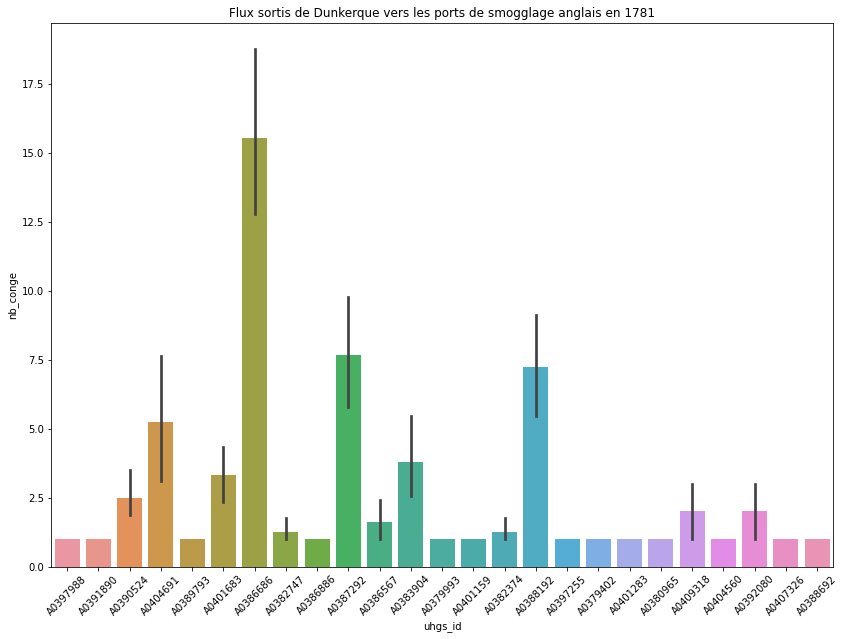

In [141]:
annee=1781

data_to_plot = tomap.query('year=={}'.format(annee)) #ou 1790

plt.figure(figsize=(14, 10))
by_port = sns.barplot(x = 'uhgs_id', y = 'nb_conge', data = data_to_plot)
by_port.set_title('Flux sortis de Dunkerque vers les ports de smogglage anglais en {}'.format(annee))
plt.setp(by_port.get_xticklabels(), rotation=45)
pylab.savefig('Barplot_{}_par_port.jpg'.format(annee), bbox_inches='tight', dpi=300)



In [142]:
import pandas.core.frame as pf
annee=1781
#data_to_plot = tomap.query('year==1781') #ou 1790


gdata = pf.DataFrame({'count' : tomap.groupby( [ "year", "uhgs_id"] ).size()}).reset_index()
print(gdata)

gdata_monthtly = pf.DataFrame({'count' : tomap.groupby( [ "month", "uhgs_id"] ).size()}).reset_index()
print(gdata_monthtly)


      year   uhgs_id  count
0   1781.0  A0379402      3
1   1781.0  A0379993      1
2   1781.0  A0380965      1
3   1781.0  A0382374      4
4   1781.0  A0382747      4
..     ...       ...    ...
57  1790.0  A0404691      1
58  1790.0  A0406923      1
59  1790.0  A0407326      2
60  1790.0  A0410522      1
61  1790.0  A1945598      1

[62 rows x 3 columns]
           month   uhgs_id  count
0        03 Mars  A0379402      1
1        03 Mars  A0381691      1
2        03 Mars  A0381991      1
3        03 Mars  A0382374      1
4        03 Mars  A0382747      1
..           ...       ...    ...
192  11 Novembre  A0392080      1
193  11 Novembre  A0397468      1
194  11 Novembre  A0401159      1
195  11 Novembre  A0401683      2
196  11 Novembre  A0404691      1

[197 rows x 3 columns]


In [143]:
mapayear = pd.merge(
    gdata,
    ports_anglais,
    how="inner",
    left_on='uhgs_id',
    right_on='uhgs_id',
    sort=True,
)

#df = pd.read_json (r'Path where the JSON file is saved\File Name.json')
mapayear.to_csv (r'./data/smogglage_anglais.csv', index = None)

In [144]:
mapamonth = pd.merge(
    gdata_monthtly,
    ports_anglais,
    how="inner",
    left_on='uhgs_id',
    right_on='uhgs_id',
    sort=True,
)

#df = pd.read_json (r'Path where the JSON file is saved\File Name.json')
mapamonth.to_csv (r'./data/smogglage_anglais_mensuel.csv', index = None)

# Préparation des données à cartographier pour le module #8
variations annuelle de fréquentation des ports smoggleurs anglais

Voir le fichier de Christian en ligne : https://docs.google.com/spreadsheets/d/189kLlEZ2EYuew7FZ6XArujuPMk5AswR1/edit#gid=1722619755



In [145]:
from dunkerquesprint import get_online_csv
#dix_ans_smog = get_online_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRq2TJOb7Ima9hBKiO1Kde_yFYoS6grucmtb6KRh6QpF4nwzjJF34WvpsGjS4wtrQ/pub?gid=1735395597&single=true&output=csv')
#Attention, truc chiant : il faut repartager l'onglet sur le Web pour ce fichier et copier le bonne URL
dix_ans_smog = get_online_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRq2TJOb7Ima9hBKiO1Kde_yFYoS6grucmtb6KRh6QpF4nwzjJF34WvpsGjS4wtrQ/pub?gid=1735395597&single=true&output=csv')
type(dix_ans_smog) #list

df_dix_ans_smog = pd.DataFrame(dix_ans_smog, columns=['destination', '1781', '1782', '1785', '1786', '1787', '1788', '1789', '1790', '1791', 'Facade'])
print(df_dix_ans_smog.shape) #(102, 11)

#Fixer les pb d'orthographe des noms des ports
df_dix_ans_smog['destination_fixed'] = df_dix_ans_smog['destination']  
df_dix_ans_smog.query('destination == "Brightlandsea"')['destination_fixed'] = 'Brightlingsea'

df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Brightlandsea'}, 'Brightlingsea')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Budleigh Salterton'}, 'Saltfleet')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Colmay-Falmouth'}, 'Falmouth')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Eawsand & Chatham'}, 'Chatham')  

df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Essex'}, 'Colchester') 
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Gravesand'}, 'Gravesend')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Greenwith'}, 'Greenwich')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Guerneze'}, 'Guernesey')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Leigh'}, 'Leith')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Lynn'}, "King's Lynn")
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Reculver'}, 'Reculvers')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Darmouth'}, 'Dartmouth')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Folkstone'}, 'Folkestone')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Greenhock'}, 'Greenock')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Ile de Whigt'}, 'île de Wight')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Lee'}, 'Lee on Solent')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Ramsay (I de Man)'}, 'île de Man')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Saint-Helen\'s'}, 'Saint Helens')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Wateford'}, 'Waterford')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'West-Mersey'}, 'Mersey')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Aberseen'}, 'Aberdeen')
df_dix_ans_smog = df_dix_ans_smog.replace({'destination_fixed': 'Pastow'}, 'Padstow')


#Milton/Middleton ?


(102, 11)


In [146]:
#Faire la jointure avec les données de port 

dix_ans_smog_map = pd.merge(
    df_dix_ans_smog,
    ports_anglais,
    how="outer",
    left_on='destination_fixed',
    right_on='toponyme_standard_fr',
    sort=True,
    #indicator=True,
    indicator="indicator_column"
)


In [147]:
pd.unique(dix_ans_smog_map.query('indicator_column == "left_only"')['destination'])

#'Non Localisés'

array(['Non Localisés'], dtype=object)

In [60]:
ports_anglais.query('toponyme_standard_fr.str.contains("Man") or toponyme_standard_en.str.contains("Isle of Wight")')[['uhgs_id', 'toponyme_standard_en','toponyme_standard_fr','shiparea', 'province']] #Reculver / Reculvers	

#Darmouth/Dartmouth
#Folkstone/Folkestone
#Greenhock/Greenock
#Ile de Whigt/Isle of Wight
#Lee/Lee on Solent
#Milton/Middleton ?
#Ramsay (I de Man)/Isle of Man
#Saint-Helen's/ Saint Helens	
#Wateford/Waterford
#West-Mersey/Mersey


uhgs_id toponyme_standard_en toponyme_standard_fr  \
ports île de Man    A0089345          Isle of Man           île de Man   
      île de Wight  A0396151        Isle of Wight         île de Wight   
supp  Ile de Whigt  A0396151        Isle of Wight         Île de Wight   

                    shiparea     province  
ports île de Man    ANE-IRSE  Isle of Man  
      île de Wight  MAN-WIGH    Hampshire  
supp  Ile de Whigt       NaN          NaN

In [148]:
dix_ans_smog_map.query('indicator_column == "both"')['destination'] #104 (sur 102 au départ)
print(dix_ans_smog_map.query('indicator_column == "both"').shape) #104, 41
dix_ans_smog_map.query('indicator_column == "both"').head()

#Sauver le fichier pour carto 
dix_ans_smog_map.query('indicator_column == "both"').to_csv (r'./data/smogglage_anglais_dix_ans.csv', index = None)

(104, 41)


# Carto sur les dix ans, vite fait

In [156]:
port_tomap = dix_ans_smog_map.query('indicator_column == "both"')
print(port_tomap.columns)

#https://colab.research.google.com/github/uwdata/visualization-curriculum/blob/master/altair_cartographic.ipynb#scrollTo=wwJ-kKtPKuJ9
import altair as alt
from vega_datasets import data

pays_url = './word1789_topojson.json'
pays = alt.topo_feature(pays_url, 'word1789_geojson')


Index(['destination', '1781', '1782', '1785', '1786', '1787', '1788', '1789',
       '1790', '1791', 'Facade', 'destination_fixed', 'Unnamed: 0', 'ogc_fid',
       'uhgs_id', 'x', 'y', 'total', 'toponym', 'toponyme_standard_fr',
       'toponyme_standard_en', 'substate_1789_fr', 'state_1789_fr',
       'substate_1789_en', 'state_1789_en', 'belonging_states',
       'belonging_substates', 'status', 'has_a_clerk', 'geonameid',
       'admiralty', 'province', 'shiparea', 'ferme_direction', 'ferme_bureau',
       'partner_balance_1789', 'partner_balance_supp_1789', 'point',
       'toponyme_Christian', 'facade', 'indicator_column'],
      dtype='object')


In [ ]:
#https://vega.github.io/vega/docs/projections/
#https://github.com/vega/vega-lite/issues/3488#issuecomment-386199585
#"scale": {"domain": [1, 25], "range":[0, 179], "clamp": true, "zero": false
# World 1789, center on England
year='1791'
map = alt.layer(
    # use the sphere of the Earth as the base layer
    alt.Chart({'sphere': True}).mark_geoshape(
        fill='#e6f3ff'
    ),
    # add a graticule for geographic reference lines
    alt.Chart({'graticule': True}).mark_geoshape(
        stroke='#ffffff', strokeWidth=1
    ),
    # and then the countries of the world
    alt.Chart(pays).mark_geoshape(
        fill='lightgray', stroke='white', strokeWidth=0.5
    ),
    #the ports
    alt.Chart(port_tomap).mark_circle().encode(
        longitude='x:Q',
        latitude='y:Q',
        size=alt.Size('{}:Q'.format(year), title='British smogglers in {}'.format(year), scale=alt.Scale(domain=[-1, 180], range=[10, 400], clamp=True, zero= False)), 
        color=alt.value('steelblue'),
        tooltip=['toponyme_standard_fr:N','{}:Q'.format(year)]
    )
).properties(
    width=400,
    height=600,
    title='British smogglers gone from Dunkirk, around 1789'
).project('conicEquidistant', scale=3000).configure_projection(center = [-4, 54]).configure_view(stroke=None)

map.save('test.png')


In [206]:
# https://panel.holoviz.org/gallery/simple/altair_choropleth.html#simple-gallery-altair-choropleth
portic_logo = 'logo_portic_petit.png'
variable_list = ['1781', '1782', '1785', '1786', '1787', '1788', '1789', '1790', '1791']

#Tentative pour rajouter le zoom et le pan - pas aboutie
#https://vega.github.io/vega/examples/zoomable-world-map/
#https://github.com/vega/vega-lite/issues/3306
selection = alt.selection_interval(bind='scales')

def get_map(variable):
    map = alt.layer(
        # use the sphere of the Earth as the base layer
        alt.Chart({'sphere': True}).mark_geoshape(
            fill='#e6f3ff'
        ),
        # add a graticule for geographic reference lines
        alt.Chart({'graticule': True}).mark_geoshape(
            stroke='#ffffff', strokeWidth=1
        ),
        # and then the countries of the world
        alt.Chart(pays).mark_geoshape(
            fill='lightgray', stroke='white', strokeWidth=0.5
        ),
        #the ports
        alt.Chart(port_tomap).mark_circle().encode(
            longitude='x:Q',
            latitude='y:Q',
            size=alt.Size('{}:Q'.format(variable), title='Number of smogglers in {}'.format(variable), scale=alt.Scale(domain=[-1, 180], range=[10, 400], clamp=True, zero= False)), 
            color=alt.value('steelblue'),
            tooltip=['toponyme_standard_fr:N','{}:Q'.format(variable)]
        )
    ).properties(
        width=400,
        height=600,
        title='Smogglage from Dunkirk to Great-Britain around 1789 years'
    ).project('conicEquidistant', scale=3000).configure_projection(center = [-4, 53]).configure_view(stroke=None)
    map.add_selection(selection)
    
    return map



#variable = pn.widgets.Select(options=variable_list, name='Variable', width=250)
variable = pn.widgets.DiscreteSlider(name='Discrete Slider', options=variable_list, value='1787')

logo = pn.panel(portic_logo, height=150, align="center")
vega_panel = pn.pane.Vega(sizing_mode="stretch_width", margin=(10,100,10,5))
    
@pn.depends(variable.param.value, watch=True)
def update_vega_pane(variable):
    vega_panel.object = get_map(variable)

update_vega_pane(variable.value)
    
row = pn.Row(
    pn.Column('# Evolution of smogglage during [1781-1791] years', logo, variable),
    vega_panel
)

row
#https://panel.holoviz.org/user_guide/Deploy_and_Export.html
#row.embed(states={variable: variable_list})
#map.save('chart.html', embed_options={'renderer':'svg'})
#row.save('test.png')

#from bokeh.resources import INLINE
#row.save('test.html', resources=INLINE)

BokehModel(combine_events=True, render_bundle={'docs_json': {'e122218c-acb0-44cb-9c72-c6915156b03d': {'defs': …

Row
    [0] Column
        [0] Markdown(str)
        [1] PNG(str, align='center', height=150)
        [2] DiscreteSlider(name='Discrete Slider', options=['1781', '1782', ...], value='1787')
    [1] Vega(LayerChart, margin=(10, 100, 10, 5), sizing_mode='stretch_width')